# Gérer des tables avec l'extension [Pandas](https://pandas.pydata.org/docs/)

## Pandas apporte une nouvelle structure de données complétant les précédentes

Avant de commencer l'explication de qu'apporte [Pandas](https://pandas.pydata.org/docs/), voici un petit rappel de ce qui a été vu précédemment.

Le langage Python gère des données de type simple comme les entiers ou les flottants. Sur la base de ces types, Python construit des types composites, qui sont les listes (avec le cas particulier des tuples) et les dictionnaires. Les listes rassemblent plusieurs données séparées par des virgules dans une structure ordonnée (par le numéro d'index, qui est toujours sous-entendu). Les dictionnaires associent une série de valeurs avec des clés (c'est pourquoi on trouve aussi en anglais le terme *associative arrays* pour qualifier ce type de structure). Ces types composites peuvent ensuite s'enchâsser les uns dans les autres et on reconnaît les listes des dictionnaires car le premier est entouré de parenthèses, le second d'accolades.

L'extension [NumPy](01_numpy.ipynb) introduit un autre type de structure appelée `ndarray`, qui veut dire vecteur à `n` dimensions ou encore matrices en langage mathématique. La caractéristique de cette structure est que tous ses éléments sont du même type et que ce type est numérique: soit un type entier, soit un type flottant. La contre-partie est une plus grande efficacité dans ce qui ne serait autrement que des listes imbriquées les unes dans les autres.

L'extension [Pandas](https://pandas.pydata.org/docs/) introduit maintenant une autre structure très courante: les tables de données, appelées ici des `dataframes`. Ce type de tables se retrouve couramment dans les bases de données relationnelles ou les feuilles de calcul d'un tableur. Les données sont rangées en colonnes, chaque colonne ne contenant qu'un seul type de données. Chaque ligne correspond à un enregistrement (dans le langage des bases de données) et cet enregistrement est référencé par un numéro d'index, qui correspond à une première colonne particulière.

Parmi ces `dataframes`, un sous ensemble bénéficie d'un traitement particulier. Il s'agit des enregistrements dont l'index est une une [date/heure](https://docs.python.org/fr/3/library/datetime.html), qui est un format particulier dans Python, qui peut se ramener à un type numérique. Cette date/heure est supposée unique pour chaque enregistrement et permet de les ordonner comme le serait les résultats d'un enregistrement séquentiel de mesures physiques faites sur un appareil. Pandas offre des fonctionalités supplémentaires pour ces `dataframes` particuliers.

À noter aussi que Pandas étant basé sur NumPy, la plupart des méthodes qui s'appliquent aux ndarray vont aussi s'appliquer aux dataframes (comme `shape`), sans oublier bien sûr toutes les méthodes qui s'appliquent aux listes.

## Liens vers des tutoriels sur pandas


- [présentation générale sur machine learnia](https://www.youtube.com/watch?v=zZkNOdBWgFQ&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=17&t=171s)

## Déclarer des dataframes

Les `dataframe` de Pandas se construisent par défaut colonne par colonne.

In [3]:
import pandas as pd

DF = pd.DataFrame({'A': [10, 20, 30], 
                   'B': [32, 42, 31],
                   'C': ["str", "dgr", "ftr"]
                   })
DF

,A,B,C
0,10,32,str
1,20,42,dgr
2,30,31,ftr


Quand certaines colonnes ne contiennent que des valeurs identiques, on peut simplifier l'entrée.

In [2]:
import numpy as np

df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Voici un autre exemple, qui illustre encore plus clairement cette méthode de déclaration par colonne.

In [3]:
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)
df

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


Les colonnes des dataframe se déclarent par défaut comme un dictionnaire de liste. Les clés du dictionnaire sont les titres des colonnes et les valeurs attachées sont les listes donnant le contenu de chaque colonne.

Voici d'autres exemples tirés de [geeksforgeeks](https://www.geeksforgeeks.org/how-to-create-dataframe-from-dictionary-in-python-pandas/). où on sépare la définition du dictionnaire de la déclaration du dataframe.

In [3]:
from pandas import DataFrame

# dictionary with list object in values
details = {
    'Name' : ['Ankit', 'Aishwarya', 'Shaurya', 'Shivangi'],
    'Age' : [23, 21, 22, 21],
    'University' : ['BHU', 'JNU', 'DU', 'BHU'],
}
  
# creating a Dataframe object 
df = DataFrame(details, index = ['a', 'b', 'c', 'd'])
df

,Name,Age,University
a,Ankit,23,BHU
b,Aishwarya,21,JNU
c,Shaurya,22,DU
d,Shivangi,21,BHU


On aurait pu aussi sélectionner que quelque unes des colonnes (et ici on ne redéfinit pas l'index).

In [ ]:
df = DataFrame(details, columns = ['Name', 'University'])
df

,Name,University
0,Ankit,BHU
1,Aishwarya,JNU
2,Shaurya,DU
3,Shivangi,BHU


On peut aussi recevoir un dictionnaire ayant une logique de liste d'objets.

In [11]:
details = { 
    'joueur A' : {
        'Name' : 'Ankit',
        'Age' : 22,
        'University' : 'BHU'
        },
    'joueur B' : {
        'Name' : 'Aishwarya',
        'Age' : 21,
        'University' : 'JNU'
        },
    'joueur C' : {
        'Name' : 'Shaurya',
        'Age' : 23,
        'University' : 'DU'
        }
}

df = DataFrame(details)
df

,joueur A,joueur B,joueur C
Name,Ankit,Aishwarya,Shaurya
Age,22,21,23
University,BHU,JNU,DU


Et si on voulait que les joueurs apparaissent comme des lignes, il suffit de faire une transposition.

In [12]:
df = df.transpose()
df

,Name,Age,University
joueur A,Ankit,22,BHU
joueur B,Aishwarya,21,JNU
joueur C,Shaurya,23,DU


On peut aussi directement utiliser la commande [from_dict](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html) qui offre plus de flexibilité et permet de construire directement selon les lignes au lieu de construire selon les colonnes.

In [8]:
# dictionary with list object in values
details = {
    'Name' : ['Ankit', 'Aishwarya', 'Shaurya', 'Shivangi'],
    'Age' : [23, 21, 22, 21],
    'University' : ['BHU', 'JNU', 'DU', 'BHU'],
}
  
# creating a Dataframe object in which dictionary
# key is act as index value and column value is
# 0, 1, 2...
df = DataFrame.from_dict(details, orient = 'index', columns=['joueur A', 'joueur B', 'joueur C', 'joueur D'])
df

,joueur A,joueur B,joueur C,joueur D
Name,Ankit,Aishwarya,Shaurya,Shivangi
Age,23,21,22,21
University,BHU,JNU,DU,BHU


## Lien entre les dataframes et les fichiers JSON

Ce lien entre les dataframes et les dictionnaires fait penser à la parenté possible avec le format [JSON](https://json.org/json-fr.html) qui nous avons vu à l'occasion de la [gestion des fichiers](../01_les_bases/02_fichiers.ipynb). Il existe dans Pandas une méthode pour écrire un dataframe dans un fichier JSON ([to_json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html)) ou ensuite le lire ([read_json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html)).

In [10]:
# écriture du dataframe précédant dans un fichier json
with open('persons.json', 'w') as file:
    df.to_json(file, indent = 4)

# relecture brute du fichier json et impression du tampon lu
with open('persons.json') as file:
    tampon = file.read()

print(tampon)

{
    "Name":{
        "0":"Braund, Mr. Owen Harris",
        "1":"Allen, Mr. William Henry",
        "2":"Bonnell, Miss. Elizabeth"
    },
    "Age":{
        "0":22,
        "1":35,
        "2":58
    },
    "Sex":{
        "0":"male",
        "1":"male",
        "2":"female"
    }
}


Ces deux fonctions contiennent plus d'option, qui correspondent à toutes les options possibles quand on écrit des types numériques dans un fichier texte.

Pour cette raison, il existe format binaire correspondant à ces structures, le format [bson](https://github.com/py-bson/bson) qui se charge avec l'extension du même nom. Ce type de format est abondamment utilisé par la base de données [mongoDB](https://www.mongodb.com/fr-fr).

## Importer des données d'exemple dans un dataframe

L'intérêt d'un dataframe sera de manipuler des grandes tables. Certaines extensions comme [seaborn](https://github.com/mwaskom/seaborn-data) contiennent des jeux de données pour démontrer leur capacités.

In [4]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(type(iris))
iris.head()

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Lire ou écrire un fichier csv

Le format [csv](https://docs.fileformat.com/spreadsheet/csv/) est assez courant pour les tables contenant des données. Les colonnes sont normalement séparées par des virgules et les lignes par des retours à la ligne. Quand on utilise les nombres décimaux formatés à la française, avec la virgule comme séparateur des décimaux, on peut préférer utiliser le point virgule pour séparer les colonnes.

Le transfert d'un data frame vers un ficher csv se fait avec la méthode [to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html).

In [18]:
with open('iris.csv', 'w') as file:
    iris.to_csv(file)

Et dans le sens inverse se fait par la méthode [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv).

In [20]:
with open('iris.csv', 'r') as file:
    df = pd.read_csv(file, index_col=0)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


On remarquera qu'il faut préciser la colonne contenant l'index, car ici on en a un. La première colonne est la colonne 0.

## Lire ou écrire des fichiers Excel

Il faut avoir une extension pour écrire des fichiers Excel. Il y a plusieurs choix. Les anciens fichiers Excel (se terminant par `.xls` se lisent avec l'extension [xlrd](https://xlrd.readthedocs.io/en/latest/). Mais pour les fichiers les plus récents se terminant par `.xlsx` ou `.xlsm`, il faut utiliser [openpyxl](https://openpyxl.readthedocs.io/en/stable/tutorial.html). Ensuite on utilise la méthode [to_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html).

In [26]:
# iris.to_excel('iris.xlsx', engine='openpyxl')
iris.to_excel('iris.xlsx')

avec la méthode [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) pour lire le fichier Excel.

In [29]:
df = pd.read_excel('iris.xlsx', index_col = 0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


comme avec le fichier csv, il faut aussi préciser que la première colonne (la colonne 0) contient les index. S'il n'y en avait pas, on ne l'aurait pas fait.

## Lire ou écrire une datable d'une base de données

On peut de la même façon faire des lectures écritures avec les tables d'une base de données supportée par l'extension [SQLAlchemy](https://www.sqlalchemy.org/). Les commandes seront [to_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html) et [read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html). 

Je ne développe pas ici, car ceci demanderait d'aller trop loin de la présentation des connexions aux bases de données avec Python.

# Manipuler les dataframes

Pour démontrer le capacités de Pandas, j'utilise le fichier des personnes du titanic. Comme il s'agit d'un fichier Excel ancienne version, je dois utiliser le lecteur [xlrd](https://xlrd.readthedocs.io/en/latest/). (On pourra aussi aller voir les fichiers données dans [cette compétition en machine learning](https://www.kaggle.com/competitions/titanic/data)).


## Premières analyses d'un dataframe

On peut extraire des colonnes.

In [3]:
import pandas as pd
# import xlrd

df = pd.read_excel('./img/titanic.xls', engine='xlrd')
print(f'nombre de lignes: {df.shape[0]}, nombre de colonnes: {df.shape[1]} et voici les premières lignes:')
df.head(3)

nombre de lignes: 1309, nombre de colonnes: 14 et voici les premières lignes:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


si je veux connaitre la liste des colonnes de ma base de ma table.

In [4]:
print(*df.columns)

pclass survived name sex age sibsp parch ticket fare cabin embarked boat body home.dest


L'astrisque utilisé devant `df.columns` transforme l'objet en une suite d'éléments.


## Réduire le dataframe aux colonnes intéressantes

Avec cette liste on peut choisir d'éliminer certaines colonnes du dataframe avec la méthode [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html). On remarque que cette méthode ne change par le dataframe donné en argument, mais renvoie un dataframe modifié. On utilise donc la forme ci-dessous pour modifier le dataframe (ou utiliser le paramètre `inplace=True`). 

In [6]:
df = df.drop(['sibsp', 'parch', 'ticket', 'cabin', 'boat', 'embarked', 'home.dest'], axis=1)
df.head(3)

,pclass,survived,name,sex,age,fare,body
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,NaN
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,NaN
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,NaN


On va maintenant pouvoir faire une statistique rapide avec la méthode [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe).

In [25]:
df.describe()

,pclass,survived,age,fare,body
count,1309.000000,1309.000000,1046.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,33.295479,160.809917
std,0.837836,0.486055,14.413500,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,1.000000
25%,2.000000,0.000000,21.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,512.329200,328.000000


Cette première vue parmet de voir que nous n'avons pas le même effectif pour la colonne `survived` qui permet d'avoir la proportion des survivants (38%) que la colonne `age`. Ceci vient du fait que l'âge n'est pas toujours renseigné.


## Gérer les données non remplies ou 'not an number' ou 'not applicable'

On obtient un filtre sur les personnes qui n'ont pas d'âge renseigné dans cette liste en utilisant la fonction [isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) dans un [filtrage par indexation](https://pythonspot.com/pandas-filter/) (et on n'affiche que les trois premiers éléments trouvés).

In [28]:
df[df['age'].isna()].head(3)

,pclass,survived,name,sex,age,fare,body
15,1,0,"Baumann, Mr. John D",male,NaN,25.925,NaN
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,26.550,NaN
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,39.600,NaN


Dans une phase de pré-traitement des données venant d'un échantillon réel, on aura souvent ce type de situation. On peut alors choisir soit d'éliminer les lignes n'ayant pas l'info avec [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html), soit par exemple ici, de remplacer avec [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) l'âge manquant par la moyenne des âges.

Comme ces deux méthodes ne remplacent pas le dataframe, mais en renvoient un nouveau, je peux tester ici successivement les deux méthodes et je n'afficher que les deux premières lignes de la commande `describe` pour montrer l'effectif qui a ou non changé.

In [32]:
# méthode remplaçant les âges manquant par la moyenne
df.fillna(df['age'].mean()).describe().head(2)

,pclass,survived,age,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,33.292871,41.983795


In [33]:
# méthode supprimant les engistrements qui n'ont le champs age rempli
df.dropna(axis=0, subset=['age']).describe().head(2)

,pclass,survived,age,fare,body
count,1046.000000,1046.000000,1046.000000,1045.00000,120.000
mean,2.207457,0.408222,29.881135,36.68608,160.875


Pour ces deux méthodes, la moyenne de l'âge n'est pas modifiée, mais les données ont tout de même été modifiées et on a donc introduit un biais. Par exemple, le pourcentage des survivants est passé de 38% à 40% dans la méthode qui consistait à supprimer les enregistrements.

## Comptage et premiers graphes d'analyse

On peut compter les personnes dans les différentes classes de cabine et l'afficher avrec un histogramme utilisant numpy en quelques lignes avec les commandes [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html?highlight=value_counts#pandas.DataFrame.value_counts) et [plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot) ou encore la propriété `plot` qui renvoie l'objet [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) de matplotlib.

<Axes: ylabel='pclass'>

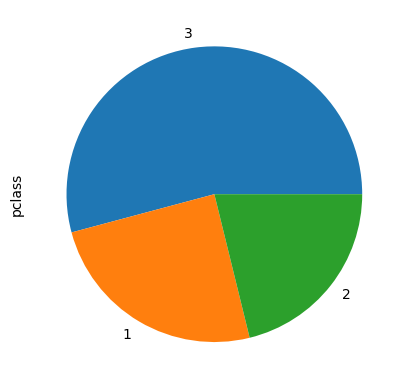

In [40]:
df['pclass'].value_counts().plot.pie()

On peut aussi utiliser des arguments de plot pour améliorer l'affichage.

<Axes: title={'center': 'répartition en classe'}, ylabel='pclass'>

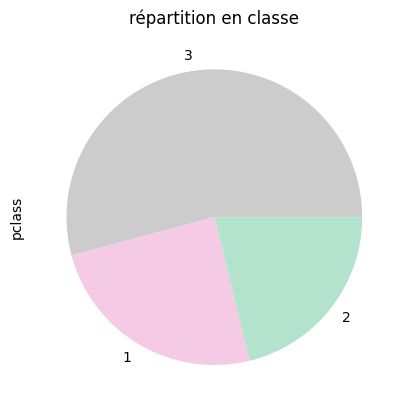

In [49]:
df['pclass'].value_counts().plot(kind='pie', 
                                 title='répartition en classes',
                                 colormap='Pastel2_r',
                                 legend=False,
                                 )

Pour choisir des couleurs, on peut aller chercher les [cartes de couleurs standards de matplotlib](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

Voici aussi l'histogramme des âges des passagers.

<Axes: ylabel='Frequency'>

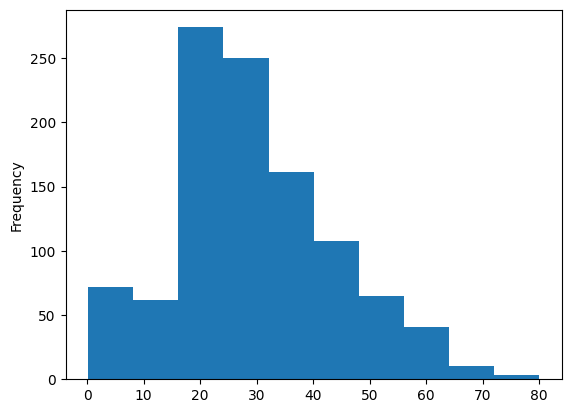

In [36]:
df['age'].plot.hist()

nous pouvons aller plus loin dans la personnalistion de l'objet [Axes.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist) et par exemple ici, nous rappelons la fonction [show](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) de matplotlib.

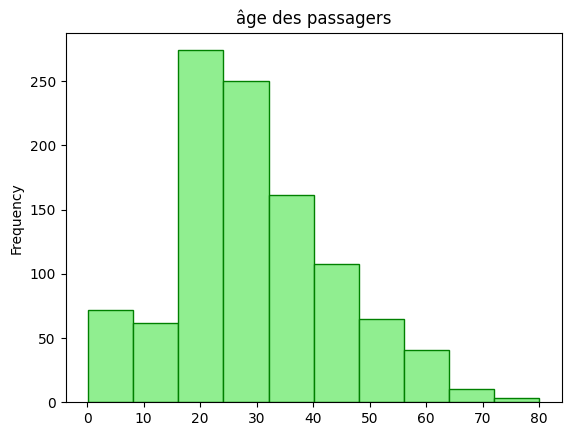

In [68]:
import matplotlib.pyplot as plt

ax = df['age'].plot.hist(color='lightgreen',
                    edgecolor='green',
                    title='âge des passagers'
                    )
plt.show()

De plus beaux résultats peuvent être obtenus avec [seaborn](12_seaborn.ipynb).

## Regrouper les données sur un critère

Un dataframe va typiquement regrouper des données numériques (ici les âges, les nombres du survivant) avec des colonnes qui peuvent être considérées comme des critères. La méthode [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) permet de créer des dataframe résultat sur lesquels ont peut faire un comptage ou afficher un nouveau graphique.

Pour avoir un résultat qui ait un sens, je ne sélectionne que les colonnes sur lesquelles je peux faire une moyenne. Ceci se fait avec la méthode [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) ou en selectionnant la liste des colonnes.

In [26]:
# df.loc[:,['sex','survived', 'age']].groupby(by=['sex'] ).mean()
df[['sex','survived', 'age']].groupby(by=['sex'] ).mean()

,survived,age
sex,,
female,0.727468,28.687071
male,0.190985,30.585233


Je peux aussi raffiner avec un deuxième étage de filtre utilisant une [fonction lambda](https://www.w3schools.com/python/python_lambda.asp), ici simplement pour prendre les personnes au dessus d'un certain âge. Néanmoins, pour une fonction aussi simple, il existe aussi une méthode plus simple comme vue plus bas.

In [49]:
df[['sex', 'survived', 'age']].loc[lambda df: df['age']>30].groupby(by=['sex'] ).mean()

# si on veut vérifier le filtrage par âge:
# df[['sex', 'survived', 'age']].loc[lambda df: df['age']>20].groupby(by=['sex'] ).min(['age'])  
# df[['sex', 'survived', 'age']].groupby(by=['sex'] ).min(['age'])

,survived,age
sex,,
female,0.823529,43.143791
male,0.186620,43.459507


On trouvera plus d'élément sur l'indexation et la section de données sur la [documentation de pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label).

# Les séries Pandas

Les séries sont des dataframe à une colonne. Il s'agit en fait d'une liste avec en plus une colonne d'index. Cet index peut être imposé.

Deux séries ayant le même index peuvent être ajoutées.

Ci-dessous, nous extrayons la série qui est la colonne `age` et nous affichons les cinq premiers éléments.

In [51]:
df['age'][0:5]

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

On voit bien la colonne d'index affichées à gauche de la colonne.

Les opérations valable sur les listes sont donc applicables ici. Voici le comptage des mineurs par classe.

In [57]:
df[df['age'] < 18]['pclass'].value_counts()


3    106
2     33
1     15
Name: pclass, dtype: int64

In [63]:
df[['sex', 'pclass', 'survived', 'age']][df['age'] < 18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

## Catégoriser les données numériquement

On cherche maintenant à rajouter une colonne dans le dataframe qui sera un nouvelle catégorie:
- cat0 : < 20 ans
- cat1 : 20 - 30 ans
- cat2 : 30 - 40 ans
- cat3 : + 40 ans

Voir cet [article sur les index enchaînés à éviter](docshttps://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy) (ce qui apparait d'ailleurs en remarque si on le fait) et donc utiliser la méthode [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html?highlight=loc#pandas.DataFrame.loc) à la place.

In [96]:
import numpy as np
df['cat']= np.nan # création d'une nouvelle colonne qu'avec des na 
df.loc[df['age'] <=20, 'cat'] = 0
df.loc[df['age'] > 20, 'cat'] = 1
df.loc[df['age'] > 30, 'cat'] = 2
df.loc[df['age'] > 40, 'cat'] = 3

df.loc[:,['cat', 'survived', 'age']].groupby('cat', sort=True).mean()

,survived,age
cat,,
0.0,0.459677,12.782930
1.0,0.371191,25.324100
2.0,0.423810,35.121429
3.0,0.396476,50.960352


On peut aussi améliorer la solution en utilisant [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html). Cette méthode applique une fonction de transformation à tous les élements de la série.

On aurait aussi de la même façon la méthode [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html?highlight=apply#pandas.DataFrame.apply) qui s'applique au dataframe (avec l'option d'indiquer selon quel axe) ou à une série.



In [99]:
def category_ages(age):
    if age <= 20:
        return '<20 ans'
    elif age <= 30:
        return '20-30 ans'
    elif age <= 40:
        return '30-40 ans'
    else:
        return '+ 40 ans'

# df['age'].map(category_ages).head()
df['cat'] = df['age'].map(category_ages)
df.head()

,pclass,survived,name,sex,age,fare,body,cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,NaN,20-30 ans
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,NaN,<20 ans
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,NaN,<20 ans
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,135.0,20-30 ans
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,NaN,20-30 ans


## Transformer des catégories en donnée numériques

On peut aussi vouloir transformer des catégories en données numériques pour pouvoir y appliquer des statistiques. Ceci peut se faire par trois méthodes.

Tout d'abord en appliquant la méthode [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) que nous venons de voir.

Nous l'appliquons ici au genre homme/femme.

In [102]:
df['sex'].map({'male': 0,'female':1}).head()

0    1
1    0
2    1
3    0
4    1
Name: sex, dtype: int64

Ou en appliquand la méthode [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html?highlight=replace#pandas.Series.replace).

In [101]:
df['sex'].replace(['male','female'], [0,1]).head()

0    1
1    0
2    1
3    0
4    1
Name: sex, dtype: int64

Ou en appliquand des [catégories](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html?highlight=category) avec la méthode [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html?highlight=astype#pandas.DataFrame.astype). Python va déduire lui même les codes numériques de catégories en fonction du nombre de cas qu'il va trouver.

In [106]:
df['sex'].astype('category').cat.codes.head()


0    0
1    1
2    0
3    1
4    0
dtype: int8

Cette dernière méthode est particulièrement intéressante quand il y aurait beaucoup de catégories différentes à différentier, car on n'a pas à les écrire explicitement comme avec les deux méthodes précédantes.

## Les dataframes pour des évènements temporels

Parmis les dataframes, il existe ceux qui dont la première colonne est un temps. C'est un cas courant, car il peut s'agir de relevés temporels.

In [6]:
dates = pd.date_range("20230101", periods=6)
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
import numpy as np

rng = np.random.default_rng(3)
df = pd.DataFrame(rng.random((6,4), dtype='float32'),
                  index= dates,
                  columns = list('ABCD'))
df


,A,B,C,D
2023-01-01,0.811504,0.085649,0.179441,0.236811
2023-01-02,0.181365,0.801274,0.869233,0.582162
2023-01-03,0.039399,0.094129,0.332202,0.433127
2023-01-04,0.621228,0.479051,0.264788,0.159739
2023-01-05,0.691417,0.734577,0.032688,0.113672
2023-01-06,0.452127,0.391228,0.887825,0.516740


Comme avec une table de base de données, on peut choisir de n'afficher que les premiers ou les derniers éléments (par défaut ces commandes montrent cinq éléments, s'il n'y pas de paramètres).

In [16]:
df.head(3)

,A,B,C,D
2023-01-01,0.811504,0.085649,0.179441,0.236811
2023-01-02,0.181365,0.801274,0.869233,0.582162
2023-01-03,0.039399,0.094129,0.332202,0.433127


In [17]:
df.tail()

,A,B,C,D
2023-01-02,0.181365,0.801274,0.869233,0.582162
2023-01-03,0.039399,0.094129,0.332202,0.433127
2023-01-04,0.621228,0.479051,0.264788,0.159739
2023-01-05,0.691417,0.734577,0.032688,0.113672
2023-01-06,0.452127,0.391228,0.887825,0.516740


On peut aussi retrouver les index.

In [18]:
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

ou les noms de colonnes

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

On peut convertir les dataframes pandas en ndarray numpy. Mais une différence fondamentale est que les éléments d'un ndarray sont tous de même type alors que les éléments d'un dataframe peuvent avoir plusieurs types, chaque colonne étant d'un type donné. La conversion est donc simple et immédiate si le dataframe a déjà la structure d'un ndarray, typiquement, s'il n'est constitué que de flottants.

In [20]:
df.to_numpy()

array([[0.8115045 , 0.08564913, 0.17944068, 0.2368105 ],
       [0.18136477, 0.8012744 , 0.8692326 , 0.582162  ],
       [0.03939909, 0.09412861, 0.33220154, 0.43312693],
       [0.6212278 , 0.4790513 , 0.2647882 , 0.1597389 ],
       [0.6914169 , 0.7345771 , 0.03268814, 0.11367202],
       [0.45212662, 0.39122814, 0.88782495, 0.51674014]], dtype=float32)

on remarquera que les index ont disparus ainsi que les noms de colonnes.